* [PEP 465 -- A dedicated infix operator for matrix multiplication](https://www.python.org/dev/peps/pep-0465/)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

In [2]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# compute cost
<img style="float: left;" src="../img/linear_cost.png">

In [3]:
X = general.get_X(data)
print(X.shape, type(X))

y = general.get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [4]:
theta = np.zeros(X.shape[1])

In [5]:
lr.cost(theta, X, y)

32.072733877455676

# batch gradient decent
<img style="float: left;" src="../img/linear_gradient.png">

In [6]:
epoch = 500
final_theta, cost_data = lr.batch_gradient_decent(theta, X, y, epoch)

In [7]:
# compute final cost
lr.cost(final_theta, X, y)

4.7138095311168664

# visualize cost data

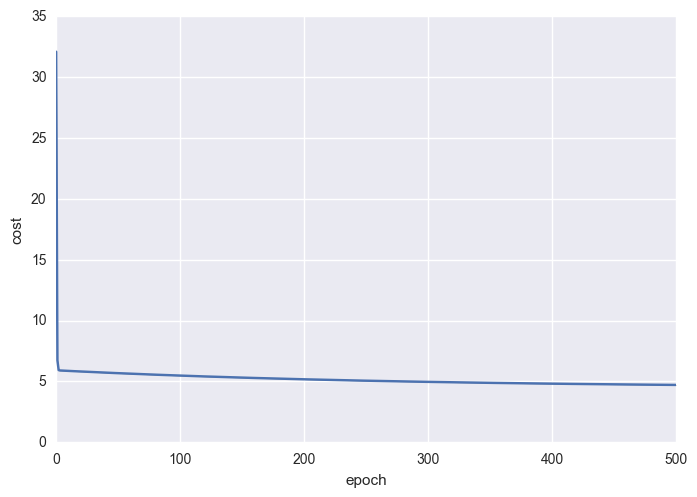

In [8]:
ax = sns.tsplot(cost_data, time=np.arange(epoch+1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')

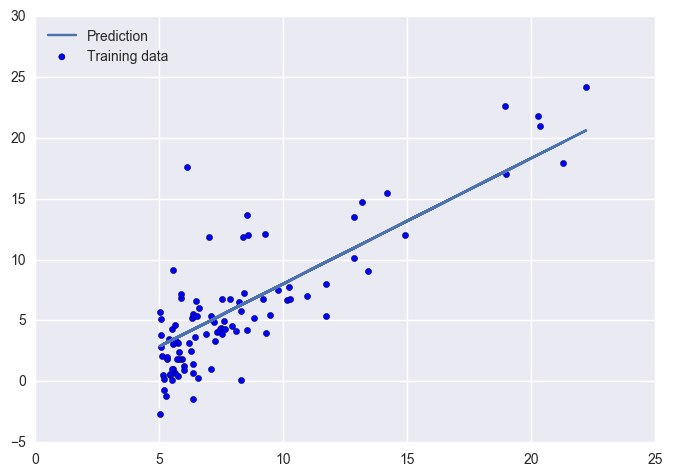

In [9]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)